# 1、多元线性回归
## 为了充分利用凸优化中一些高效、成熟的优化方法，比如共轭梯度、拟牛顿法等，很多机器学习的方法都倾向于选择合适的模型和损失函数。
## 在机器学习中，最简单、常用的方法就是梯度下降法，首先初始化参数$\theta_0$然后按照下面的公式来计算训练集D上的风险函数的最小值。
$$
\begin{align}
\theta_{t+1}=\theta_t-\alpha\frac{\partial R_D(\theta)}{\partial \theta}
=\theta_t-\alpha\frac{1}{N}\sum_{n=1}^{N}{\frac{\partial L(y^{(n)},f(x^{(n)};\theta))}{\partial \theta}}
\end{align}
$$
## 其中$\theta_t$为第t次迭代时的参数值，$\alpha$为搜索步长，在机器学习中，$\alpha$一般称为学习率。

In [2]:
#首先导入需要的包
import pandas as pd 
import numpy as np
import timeit
import time

## 1.1 批量梯度下降
优化的代价函数是关于所有数据样本的loss,计算整个样本的loss后才更新权值

In [6]:
#编写bgd函数
def bgd(x,y,init_w,iter_size,lr):
    '''
    x:输入数据x
    init_w:初始化的参数
    y：输出y
    iter_size:迭代次数
    lr:学习率
    '''
    start_time = timeit.default_timer()
    w = init_w
    m = x.shape[0]
    for i in range(iter_size):
        predict = x.dot(w) 
        grad = x.T.dot((predict - y)) / m * lr
        w -= grad 
    print(w)
    end_time = timeit.default_timer()
    print ('时间损耗为: ',end_time - start_time)
#使用样本量为2000，维度为5的数据进行测试
# data_num = 2000
# weight_num = 5
# x,y = loadData(data_num,weight_num)
w = np.zeros((3,1)) #初始化w
# bgd(x,y,w.copy(),100,0.1)

In [4]:
data = pd.read_csv(r'C:\Users\aron\Desktop\Advertising.txt')

In [11]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
x = data.iloc[:,0:3]
y = data.iloc[:,3:]

In [7]:
bgd(x,y,w.copy(),100,0.1)

            0  sales
TV        NaN    NaN
radio     NaN    NaN
newspaper NaN    NaN
时间损耗为:  0.27409290000002784


In [12]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

In [14]:
sgd.fit(x,y)

#利用sklearn中的混淆矩阵来计算均方误差MSE
from sklearn.metrics import mean_squared_error
y_pred = x.dot(w)
mean_squared_error(y,y_pred)

C:\Users\aron\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


223.71625

我们可以看出来用批量梯度下降效果很差，接下来我们用随机梯度下降以及小批量梯度下降继续模拟。

## 1.2 随机梯度下降
优化的代价函数是单个数据样本的loss，计算每个样本的loss后就立即更新权值

In [38]:
#编写sgd函数
def sgd(x, y, init_w, iter_size, lr):
    start_time = timeit.default_timer()
    w = init_w
    for i in range(iter_size):
        for j in range(x.shape[0]):
            temp_x = x[np.newaxis,j]
            temp_y = y[np.newaxis, j]
            predict = temp_x.dot(w)
            grad = temp_x.T.dot((predict - temp_y)) / 1 * lr 
            w -= grad
    print (w)
    end_time = timeit.default_timer()
    print ('时间损耗: ', end_time - start_time)
#使用样本量为2000，维度为5的数据进行测试
w = np.zeros((weight_num,1)) #初始化w
sgd(x,y,w.copy(),100,0.1)

[[0.74746832]
 [0.09270717]
 [0.3490016 ]
 [0.51892012]
 [0.95071384]]
时间损耗:  1.079916200000298


In [28]:
#利用sklearn中的混淆矩阵来计算均方误差MSE
from sklearn.metrics import mean_squared_error
y_pred2 = x.dot(w)
mean_squared_error(y,y_pred2)

0.2815500182694513

## 1.3 小批量随机梯度下降
优化的代价函数是每块(batch_size)数据样本的loss，计算每快样本的loss后就更新权值

In [29]:
#编写minibgd函数
def minibgd(x,y,init_w,iter_size,lr,batch_size):
    start_time = timeit.default_timer()
    w = init_w
    batch_predict = np.zeros((batch_size, 1))
    batch_x = np.zeros((batch_size, init_w.shape[0]))
    batch_y = np.zeros((batch_size, 1))
    m = batch_size
    batch_num = 0
    for i in range(iter_size):
        for j in range(x.shape[0]):
            batch_x[batch_num] = x[np.newaxis, j]
            batch_predict[batch_num][0] = batch_x[batch_num].dot(w)
            batch_y[batch_num][0] = y[np.newaxis, j]
            batch_num += 1
            if batch_num==batch_size:
                batch_num = 0
                # x:(batch_size,weight_num) x.T:(weight_num,batch_size) 
                # y-predit:(batch_size,1)
                # grad:(weight_num,1)
                grad = batch_x.T.dot((batch_predict - batch_y)) / m *lr
                w -= grad
    print (w)
    end_time = timeit.default_timer()
    print ('损耗时间: ', end_time - start_time)
#使用样本量为2000，维度为5的数据进行测试
w = np.zeros((weight_num,1)) #初始化w
minibgd(x,y,w.copy(),100,0.1,20)

[[0.40290116]
 [0.41402132]
 [0.04587892]
 [0.01142551]
 [0.08324606]]
损耗时间:  0.5230379000004177


In [30]:
#利用sklearn中的混淆矩阵来计算均方误差MSE
from sklearn.metrics import mean_squared_error
y_pred3 = x.dot(w)
mean_squared_error(y,y_pred3)

0.2815500182694513

### 由于批梯度下降是整个样本，可以利用numpy里面的矩阵乘法，速度较快。而随机梯度下降需要每个样本单独乘速度慢些，小批量梯度是保存到一个子集过后的样本后算乘法，但是由于多了赋值保存等操作还是比批梯度下降慢了些。
### 在这个数据集中，我们可以看出使用批梯度下降算法的效果较差，MSE远大于使用随机梯度下降和小批次梯度下降。因此在这个数据集中使用随机梯度下降算法和小批量梯度下降算法效果较好。

# 

# 

# 2、逻辑回归

## 问题说明：
这里将建立一个逻辑回归模型来预测一个学生是否被大学录取。
假设我是一个大学的管理员，想根据两次考试的结果来决定每个申请人的录取机会，目前有以前的申请人的历史数据。可以用历史数据作为逻辑回归的训练集。对于每一个样本,有两次考试的申请人的成绩和录取决定。建立一个分类模型，根据考试成绩估计能否入学。


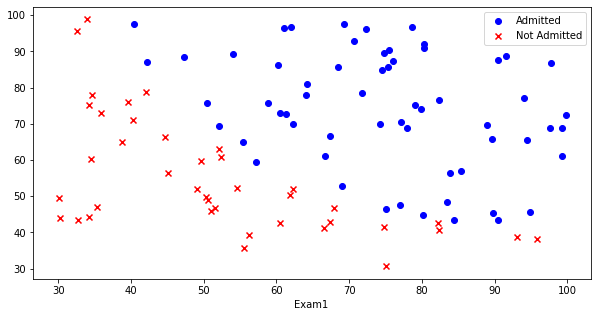

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\aron\Desktop\adimited.txt', 
header=None, names=['Exam1', 'Exam2', 'Admitted'],  engine='python')
data.head()
 #展示数据前五列
positive = data[data['Admitted']==1]
negative = data[data['Admitted']==0]
plt.figure(figsize=(10,5))#设置画布
plt.scatter(positive['Exam1'], positive['Exam2'], c='b', marker='o',  label='Admitted')#绘制散点图positive的点，Exam1和Exam2组成一个点
plt.scatter(negative['Exam1'], negative['Exam2'], c='r', marker='x', label='Not Admitted')#绘制散点图negative的点
plt.legend()# 添加图例（也就是图中右上角positive和negative的解释）
plt.xlabel('Exam1 ')#添加x轴标签plt.ylabel('Exam2 ')#添加y轴标签
plt.show()

In [25]:
# 定义模型函数
# X 是样本数据，它的每一行都是一个样本，每一列为样本的某一个特征。
# theta 表示参数，它是我们通过学习获得的，其中，对于每一个特征，都对应一个 theta
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))


In [27]:



# 定义损失函数
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply((1 - y), np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

# 计算梯度
# 计算每个参数的梯度方向
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta) - y).ravel()
    for j in range(len(theta.ravel())):  # for each parmeter
        term = np.multiply(error, X[:, j])
        grad[0, j] = np.sum(term) / len(X)
    return grad


# 设置三种策略
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2


def stopCriterion(type, value, threshold):
    # 设定三种停止策略
    if type == STOP_ITER:
        return value > threshold
    elif type == STOP_COST:
        return abs(value[-1] - value[-2]) < threshold
    elif type == STOP_GRAD:
        # linalg=linear（线性）+algebra（代数），norm则表示范数
        return np.linalg.norm(value) < threshold


import numpy.random


# 洗牌
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols - 1]
    y = data[:, cols - 1:]
    return X, y


import time


def descent(data, theta, batchSize, stopType, thresh, alpha):
    #  梯度下降
    init_time = time.time()
    # 迭代次数
    i = 0
    # batch
    k = 0
    X, y = shuffleData(data)
    # 计算的梯度
    grad = np.zeros(theta.shape)
    # 损失值
    costs = [cost(X, y, theta)]

    while True:
        grad = gradient(X[k:k + batchSize], y[k:k + batchSize], theta)
        # 取batch数量个数据
        k += batchSize
        # 这个 n 是在运行的时候指定的，为样本的个数
        if k >= n:
            k = 0
            # 重新洗牌
            X, y = shuffleData(data)
        # 参数更新
        theta = theta - alpha * grad
        # 计算新的损失
        costs.append(cost(X, y, theta))
        i += 1

        if stopType == STOP_ITER:
            value = i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad
        if stopCriterion(stopType, value, thresh):
            break
    return theta, i - 1, costs, grad, time.time() - init_time


def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    # import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:, 1] > 2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize == n:
        strDescType = "Gradient"
    elif batchSize == 1:
        strDescType = "Stochastic"
    else:
        strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER:
        strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST:
        strStop = "costs change < {}".format(thresh)
    else:
        strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta



In [31]:
# 在第 0 列，插入一列，名称为"Onces"，数值全为 1
data.insert(0, 'Onces', 1)
# X：训练数据   Y：目标值
# 将数据的panda表示形式转换为对进一步计算有用的数组
# 这个方法过时会有警告
orig_data = data.values
cols = orig_data.shape[1]
X = orig_data[:, 0:cols - 1]
y = orig_data[:, cols - 1:cols]
# 初始化theta
theta = np.zeros([1, 3])

X.shape, y.shape, theta.shape


((100, 3), (100, 1), (1, 3))

## 2.1批量梯度下降
设置迭代次数为停止策略，设定迭代次数为5000次

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00026726  0.00713145  0.00390074]] - Iter: 5000 - Last cost: 0.63 - Duration: 0.76s


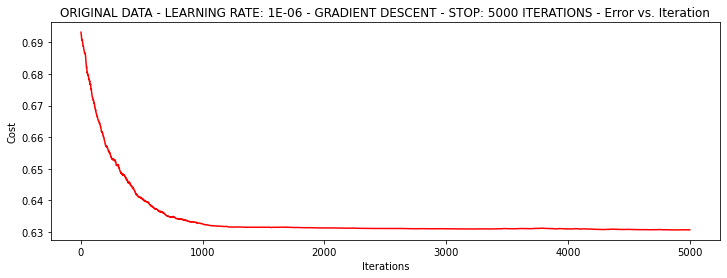

In [33]:
#设置迭代次数为停止策略，设定迭代次数为5000次

# 选择的梯度下降方法是基于所有样本的
# 当n值指定为10的时候,相当于整体对于梯度下降,为什么呢?因为我的数据样本就10个.
# 传进来的数据是按照迭代次数进行停止的,
# 指定迭代次数的参数是thresh=5000.学习率是alpha=0.000001.
n = 10
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)
plt.show()


## 2.2随机梯度下降


***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-0.29355285  0.01647451 -0.00122113]] - Iter: 4119 - Last cost: 0.61 - Duration: 0.64s


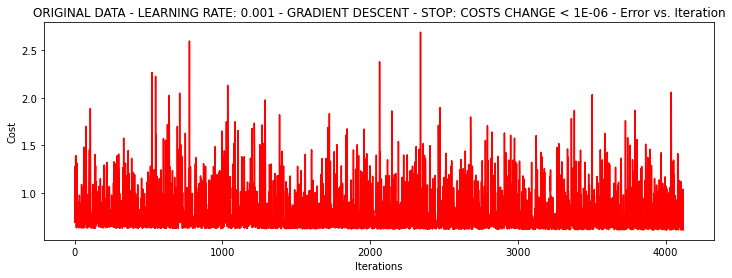

In [34]:
#设置迭代次数为停止策略，设置迭代次数为5000

# 设定阈值 1E-6, 差不多需要110 000次迭代
runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)
plt.show()


如果采用随机梯度下降（每次只使用一个样本），或者小批量梯度下降（每次采用 mini-batch），会产生上面的效果——波动太大

有至少两种解决方案：

（1）将学习率调小一点，情况肯定会有所改善

（2）对数据去均值化。将数据按其属性(按列进行)减去其均值，然后除以其方差。最后得到的结果是，对每个属性/每列来说所有数据都聚集在0附近，方差值为1。

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[ 0.00705949  0.00181457 -0.00146384]] - Iter: 50 - Last cost: 0.69 - Duration: 0.01s


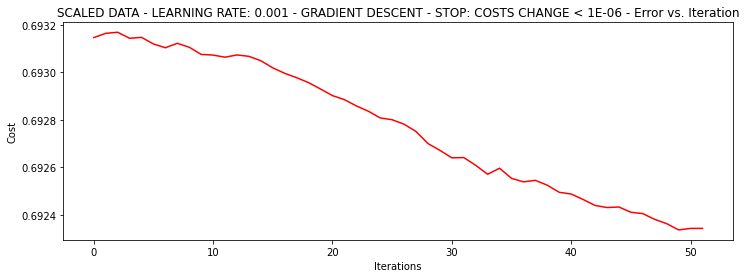

In [38]:
runExpe(scaled_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)
plt.show()


从图中可以看出来损失函数是基本收敛的，速度比较快，但是整体不是很稳定。

## 2.3小批量梯度下降



In [36]:
#我们先对数据进行标准化，将数据按照属性减去均值，然后除以方差
from sklearn import preprocessing 
scaled_data = orig_data.copy() 
scaled_data[:,1:3] = preprocessing.scale(data.iloc[:,1:3])

***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.004
Theta: [[ 0.41454425  0.11479391 -0.17005683]] - Iter: 47239 - Last cost: 0.67 - Duration: 7.92s


array([[ 0.41454425,  0.11479391, -0.17005683]])

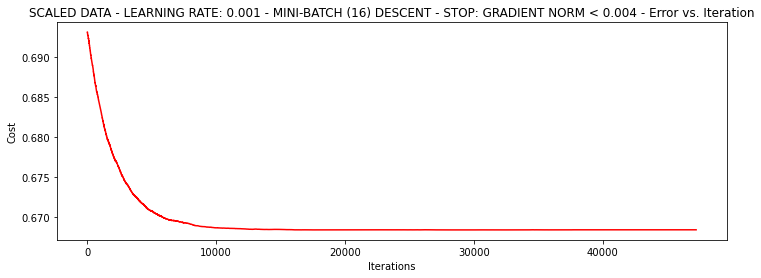

In [37]:
#设置迭代次数为5000次执行批量梯度下降策略

runExpe(scaled_data,theta,16,STOP_GRAD,thresh=0.002*2,alpha=0.001)

可以看出使用标准化过后的数据进行小批量梯度（每次取32个数据）下降得到的损失小得多，我们最终得到的损失达到了0.67。

从以上结论可以发现，小批量梯度下降在运行时间和效果方面都优于随机梯度下降和批量梯度下降，因此可以得出结论，在此次案例中小批量梯度下降的策略是相对较好的。